In [37]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "state1_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,1.046972,9.521707,69.319600,22.941639
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,1.153392,11.245602,84.723694,20.737572
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,5.708309,24.616348,105.462135,18.996666
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,3.099853,17.929585,57.610783,23.959110
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,1.197121,2.787075,16.806042,91.713660


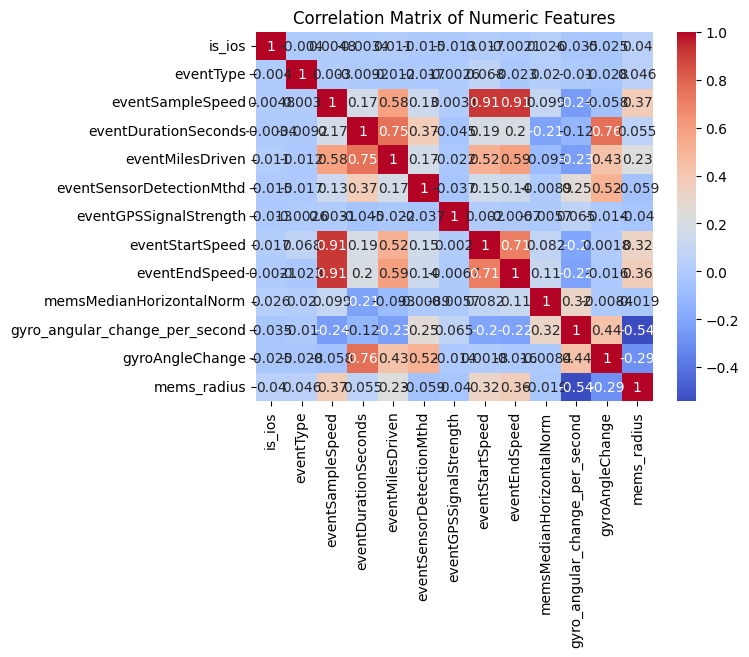

In [39]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlations
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['float64', 'int64'])
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

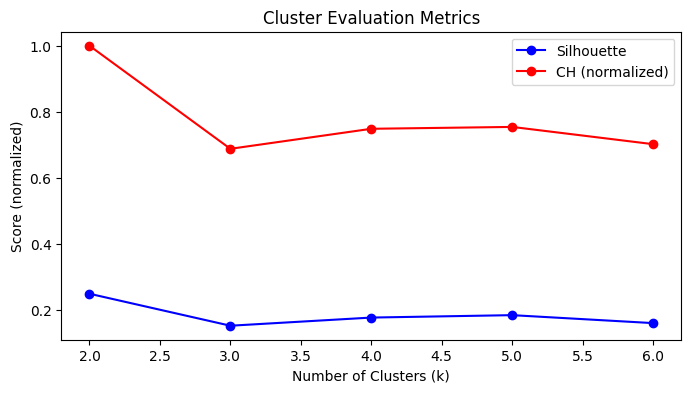

In [41]:
import matplotlib.pyplot as plt

k_vals = [r[0] for r in results]
sil_vals = [r[1] for r in results]
ch_vals = [r[2] for r in results]

plt.figure(figsize=(8,4))
plt.plot(k_vals, sil_vals, 'bo-', label='Silhouette')
plt.plot(k_vals, [c / max(ch_vals) for c in ch_vals], 'ro-', label='CH (normalized)')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score (normalized)")
plt.legend()
plt.title("Cluster Evaluation Metrics")
plt.show()

In [42]:
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

results = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)

    results.append((k, sil, ch))
    best_k = k if (len(results) == 0 or sil > results[-1][1]) else best_k

for r in results:
    print(f"k={r[0]} | Silhouette={r[1]:.3f} | CH Score={r[2]:.0f}")

k=2 | Silhouette=0.248 | CH Score=11468
k=3 | Silhouette=0.151 | CH Score=7885
k=4 | Silhouette=0.176 | CH Score=8581
k=5 | Silhouette=0.183 | CH Score=8646
k=6 | Silhouette=0.159 | CH Score=8046
k=7 | Silhouette=0.184 | CH Score=7837
k=8 | Silhouette=0.151 | CH Score=6471
k=9 | Silhouette=0.162 | CH Score=7366


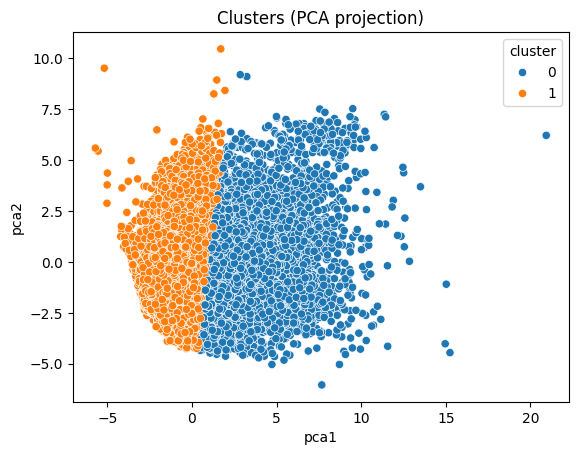

In [48]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=best_k)
pca_data = pca.fit_transform(X_scaled)

df['pca1'], df['pca2'] = pca_data[:,0], pca_data[:,1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Clusters (PCA projection)")
plt.show()

In [45]:
df.groupby('cluster').mean(numeric_only=True).T

cluster,0,1
is_ios,0.985646,0.978064
eventType,4.557542,4.498013
eventSampleSpeed,26.408615,12.435121
eventDurationSeconds,7.043412,4.545236
eventMilesDriven,0.046533,0.015889
eventSensorDetectionMthd,1.416604,1.145559
eventGPSSignalStrength,5.496779,5.533249
eventStartSpeed,27.206312,11.771185
eventEndSpeed,27.284217,14.047888
memsMedianHorizontalNorm,1.963537,2.022448
